# 어느 지역이 보험금을 잘 쓰는가?

데이터 분석을 통해 어느 지역이 보험금을 효율적으로 사용하고 있는지 확인하고자 합니다.\
이를 알아보기 위해 1인당 본인부담금이 얼마인지 알아보고, 그것을 지역별뿐만 아니라 성별, 연령별로도 나누어 데이터를 분석할 예정입니다.

# 1. 서론

## 보험의 종류

#### 건강보험

국민건강보험으로 우리가 흔히 아는 약국에서, 진료시에 어느정도 금액을 절감해주는 보험.

국민 상호간 위험분담 및 의료비 공동해결이라는 목적을 지니고 있음. 그렇기에 일정 법적 요건 달성시 강제로 납부의무 부여

입원시 80%, 외래진료시 병원 종류에 따라 의원 70%, 병원 60%, 종합병원 50%, 상급종합병원 40% 지원

#### 생명보험

사람의 생존 또는 사망과 관련하여 발생하는 경제적 손실을 보상해 주는 보험.

정액보상

생명보험사에서만 해당 상품 판매 가능

#### 손해보험

우연한 사건으로 발생하는 재산상 손해를 보상하는 보험

실손보상

손해보험사에서만 해당 상품 판매 가능

#### 제3보험

사람의 질병, 상해, 간병에 관해 약속한 금액을 지급하거나 그로 인한 손해를 보상하는 보험

실손보상과 정액보상 두 가지 모두를 포함.

손해보험사, 생명보험사 양사 모두에서 판매가능

갱신형 상품이 대부분으로 일반적인 정액보험과 달리 보험료가 매년 변동됨.

##### 실손보험

비용의 손해로 인한 금액을 측정해 일정금액 한도 내에서 실제 부담한 금액을 보장

##### 정액보험

질병 또는 재해로 인한 피해를 입을 경우 사전에 약정한 금액을 보장

# 2. 본론

## (1) 자료불러오기 및 정리하기

In [81]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#소수점 3자리까지 표시
%precision 3

'%.3f'

In [82]:
data1= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '38p연령성별',
                     header=[4,5], index_col = [0,1])
data2= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '40p',
                     header=[4,5], index_col = [0,1])
data3= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '42p',
                     header=[4,5], index_col = [0,1])
data4= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '44p',
                     header=[4,5], index_col = [0,1])
data5= pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '46p',
                     header=[4,5], index_col = [0,1])

data1=data1.dropna()
data2=data2.dropna()
data3=data3.dropna()
data4=data4.dropna()
data5=data5.dropna()

In [83]:
total_data=pd.concat([data1.T,data2.T,data3.T,data4.T,data5.T]).T
total_data

구분
Division                                            계               \
                                         진료실인원\nPatients 내원일수\nVisit    
                                                                        
계                         Total 계 T          4.96342e+07  1.16511e+09   
                                남자 M         2.42965e+07  5.03416e+08   
                                여자 F         2.53376e+07  6.61697e+08   
서    울\nSeoul                      계   T      9.2221e+06  2.02046e+08   
                                 남자  M       4.39683e+06  8.60823e+07   
                                여자  F        4.82527e+06  1.15964e+08   
부    산\nBusan                      계   T     3.22622e+06  8.85023e+07   
                                 남자  M       1.55164e+06  3.69864e+07   
                                여자  F        1.67457e+06  5.15159e+07   
대    구\nDaegu                      계   T     2.31659e+06  5.65318e+07   
                                 남자  M       1.12158e+06  2.42336e+07   
                                여자  F        1.19501e+06  3.22982e+07   
인    천\nIncheon                    계   T     2.82126e+06  6.30116e+07   
                                 남자  M       1.38431e+06  2.73194e+07   
                                여자  F        1.43695e+06  3.56922e+07   
광    주\nGwangju                    계   T      1.3919e+06  3.44164e+07   
                                 남자  M            674528  1.47073e+07   
                                여자  F             717368  1.97091e+07   
대    전\nDaejeon                    계   T     1.40736e+06  3.36284e+07   
                                 남자  M            689084  1.46005e+07   
                                여자  F             718281  1.90279e+07   
울    산\nUlsan                      계   T     1.10159e+06  2.46982e+07   
                                 남자  M            556031   1.0995e+07   
                                여자  F             545556  1.37032e+07   
세    종\nSejong                     계   T          330066  7.02316e+06   
                                 남자  M            162776  3.13116e+06   
                                여자  F             167290    3.892e+06   
경    기\nGyonggi                    계   T     1.27705e+07  2.65817e+08   
                                 남자  M       6.31484e+06  1.17033e+08   
                                여자  F        6.45571e+06  1.48784e+08   
강    원\nGangwon                    계   T     1.45579e+06  3.28926e+07   
                                 남자  M            716561  1.45159e+07   
                                여자  F             739233  1.83766e+07   
충    북\nChungbuk                   계   T     1.54823e+06  3.74551e+07   
                                 남자  M            771528  1.64069e+07   
                                여자  F             776703  2.10482e+07   
충   남\nChungnam                    계   T     2.06826e+06  5.05758e+07   
                                 남자  M       1.03723e+06  2.23483e+07   
                                여자  F        1.03103e+06  2.82275e+07   
전    북\nJeonbuk                    계   T     1.74944e+06  5.13491e+07   
                                 남자  M            854547  2.17659e+07   
                                여자  F             894894  2.95831e+07   
전    남\nJeonnam                    계   T     1.80226e+06  5.41426e+07   
                                 남자  M            888791  2.29272e+07   
                                여자  F             913472  3.12154e+07   
경    북\nGyeongbuk                  계   T      2.5541e+06  6.59622e+07   
                                 남자  M       1.26199e+06  2.85949e+07   
                                여자  F        1.29211e+06  3.73673e+07   
경    남\nGyeongnam                  계   T     3.22667e+06   8.1606e+07   
                                 남자  M       1.59766e+06  3.51116e+07   
                                여자  F        1.62901e+06  4.64944e+07   
제    주\nJeju                       계   T          641778  

In [84]:
# 진료비-급여비=본인부담금
total_data[('계', '본인부담금')]=(total_data[('계','진료비\nMedical Expense')]-total_data[('계','급여비\nBenefit')])/total_data[('계','진료실인원\nPatients')]
total_data[('0~9세', '본인부담금')]=(total_data[('0~9세','진료비\nMedical Expense')]-total_data[('0~9세','급여비\nBenefit')])/total_data[('0~9세','진료실인원\nPatients')]
total_data[('10 ~ 19세', '본인부담금')]=(total_data[('10 ~ 19세','진료비\nMedical Expense')]-total_data[('10 ~ 19세','급여비\nBenefit')])/total_data[('10 ~ 19세','진료실인원\nPatients')]                            
total_data[('20 ~ 29세', '본인부담금')]=(total_data[('20 ~ 29세','진료비\nMedical Expense')]-total_data[('20 ~ 29세','급여비\nBenefit')])/total_data[('20 ~ 29세','진료실인원\nPatients')]
total_data[('30 ~ 39세', '본인부담금')]=(total_data[('30 ~ 39세','진료비\nMedical Expense')]-total_data[('30 ~ 39세','급여비\nBenefit')])/total_data[('30 ~ 39세','진료실인원\nPatients')]
total_data[('40 ~ 49세', '본인부담금')]=(total_data[('40 ~ 49세','진료비\nMedical Expense')]-total_data[('40 ~ 49세','급여비\nBenefit')])/total_data[('40 ~ 49세','진료실인원\nPatients')]
total_data[('50 ~ 59세', '본인부담금')]=(total_data[('50 ~ 59세','진료비\nMedical Expense')]-total_data[('50 ~ 59세','급여비\nBenefit')])/total_data[('50 ~ 59세','진료실인원\nPatients')]                                        
total_data[('60 ~ 69세', '본인부담금')]=(total_data[('60 ~ 69세','진료비\nMedical Expense')]-total_data[('60 ~ 69세','급여비\nBenefit')])/total_data[('60 ~ 69세','진료실인원\nPatients')]
total_data[('70 ~ 79세', '본인부담금')]=(total_data[('70 ~ 79세','진료비\nMedical Expense')]-total_data[('70 ~ 79세','급여비\nBenefit')])/total_data[('70 ~ 79세','진료실인원\nPatients')]
total_data[('80세 이상', '본인부담금')]=(total_data[('80세 이상','진료비\nMedical Expense')]-total_data[('80세 이상','급여비\nBenefit')])/total_data[('80세 이상','진료실인원\nPatients')]

In [113]:
total_data3 = total_data.T.iloc[[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]].T
total_data3.columns=['age_total','0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'above 80']

total_data4=total_data3.unstack()
renew_index=['region_total','Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']
total_data4.index=renew_index

total_1인당본인부담금=total_data4.stack()

total_1인당본인부담금_지역=total_1인당본인부담금.iloc[::3]
total_1인당본인부담금_지역.index=renew_index

total_1인당본인부담금_지역 = total_1인당본인부담금_지역.astype('float')
total_1인당본인부담금_지역

,age_total,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,above 80
region_total,431.071842,220.027289,157.350481,181.350043,250.419273,307.843763,456.378438,705.094790,1039.238255,1349.993679
Seoul,414.315894,216.942462,167.122238,187.135427,250.977202,307.475780,444.482854,674.481959,997.658572,1299.085234
Busan,489.532423,234.072795,162.289131,182.903191,259.821879,321.632276,478.159871,740.000531,1106.156471,1671.258848
Daegu,420.603816,222.765818,155.397026,170.882479,245.676083,299.700238,442.131598,684.117121,1004.137494,1307.504305
Incheon,414.433908,218.801693,159.256369,184.884740,252.260465,316.558501,476.197311,715.131031,1033.601600,1240.111952
Gwangju,455.547033,259.220117,168.739692,197.494230,282.989116,335.517656,510.865611,775.363945,1108.395463,1719.720977
Daejeon,409.577071,233.573746,160.414972,178.254569,249.931602,305.720804,446.800569,693.187156,1028.450903,1401.788783
Ulsan,401.558894,216.368011,151.684191,176.065949,247.432976,302.721645,443.094316,687.678708,1090.981232,1676.732823
Sejong,363.862419,223.204094,164.538376,182.747484,249.636479,294.183044,439.528981,715.810702,1099.519254,1437.228028
Gyonggi,390.509942,214.666039,158.861705,179.184518,245.148322,302.253463,447.501612,683.526473,1001.482105,1237.880991


## (2) 연령에 따른 지역별, 성별 1인당 본인부담금

### 1) 연령에 따른 1인당 본인부담금

In [114]:
total_1인당본인부담금_지역_Total = total_1인당본인부담금_지역.loc['region_total']
age_label = total_1인당본인부담금_지역_Total.index.to_list()

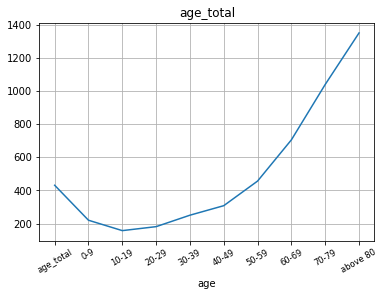

In [115]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_Total)
labels= ax.set_xticklabels(age_label, rotation = 30, fontsize = 'small')
ax.set_xlabel('age')
ax.set_title('age_total')
plt.grid(True)

크게 연령별로 1인당 본인부담금의 차이가 어떤지 위의 그래프를 통해 확인해보면, 대체적으로 나이가 증가할수록 본인부담금이 증가하는 것을 볼 수 있습니다.

### 2) 연령에 따라 성별로 분류하여 data 만들기

이 아래에는 각 연령에따라 지역별 1인당 본인부담금을 분류하고, 이를 시각화한 code입니다.\
성별에 따른 수치 또한 그래프에 포함할 예정이기에 성별에 따라 data를 먼저 분류하였습니다.

In [116]:
total_data5=total_data3.unstack()
new_index=['Total','Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']
total_data5.index=new_index

total_1인당본인부담금_gender=total_data5.stack()

total_1인당본인부담금_지역_male=total_1인당본인부담금_gender.iloc[1::3]
total_1인당본인부담금_지역_male.index=new_index

total_1인당본인부담금_지역_female=total_1인당본인부담금_gender.iloc[2::3]
total_1인당본인부담금_지역_female.index=new_index

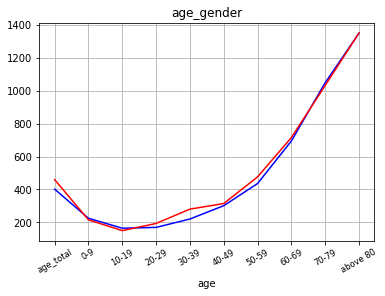

In [117]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(total_1인당본인부담금_지역_male.loc['Total'], color= 'blue')
ax.plot(total_1인당본인부담금_지역_female.loc['Total'], color= 'red')
labels= ax.set_xticklabels(age_label,rotation = 30, fontsize = 'small')
ax.set_xlabel('age')
ax.set_title('age_gender')
plt.grid(True)

이 그래프를 통해 알 수 있듯이 성별에 따른 차이는 많지 않은 것을 알 수 있습니다.

### 3) 지역별, 성별 1인당 본인부담금

연령별, 성별을 가지고 구분한 1인당 본인부담금을 통해 자신이 어떤 group에 속해있는지, 그 group은 지역에 따라서 본인이 얼만큼 부담하여야하는지 알 수 있습니다. \
이를 통해 지역별로 비교를 해 볼 수 있습니다. \
또한, 이후 의료시스템의 수와 연관시켜 좀 더 비교를 할 수 있을 것입니다.

#### 3-1) 나이 전체

<BarContainer object of 18 artists>

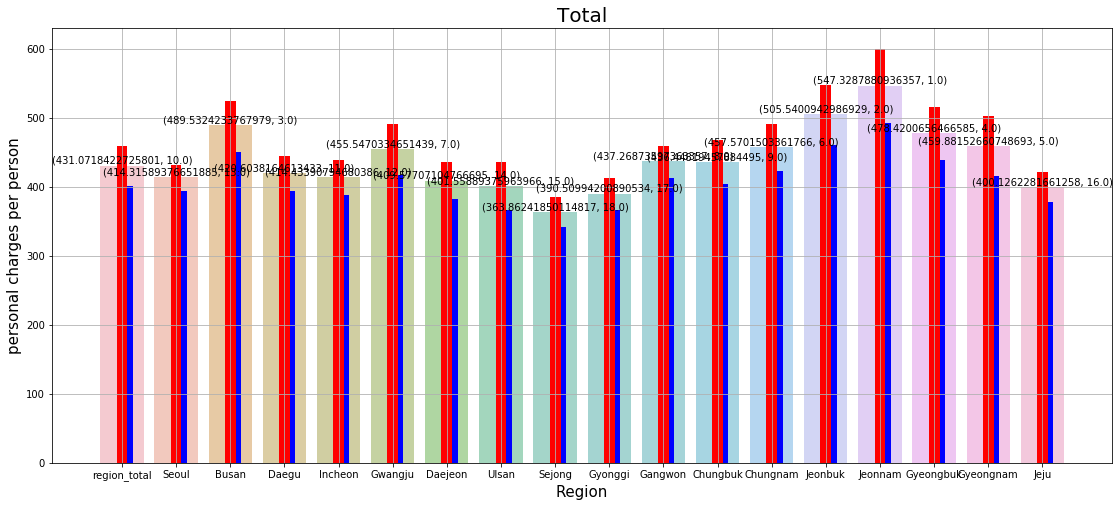

In [118]:
x = list(total_1인당본인부담금_지역.index)
y = total_1인당본인부담금_지역['age_total']
r = np.arange(len(x))

tot = []
a = list(y)
b =  list(y.rank(ascending = False))
for i in range(len(a)):
    tot.append((a[i], b[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y, alpha = 0.5)
plt.title("Total",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)

for i, v in enumerate(r):
    plt.text(v, y[i], tot[i], horizontalalignment = 'center', verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['age_total'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['age_total'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

연령 전체 그래프에 대해 먼저 설명하자면, \
각 성별의 수치가 (특히 여성의 수치가) 각 연령에서의 전체 수치보다 높은것은 total은 성별 전체 total을 통해 분석한 값을, 남성은 남성만을 보았을 때의 total을 통해 분석한 값을, 여성은 여성만을 보았을 때의 total을 통해 분석한 값을 나타내고 있기 때문입니다. \
다시말해, total은 남여 수치의 평균을 나타내고 있습니다. \
아래의 그래프들 또한 연령 전체 그래프와 같은 상황을 전제하고 있습니다.

#### 3-2) 0~9세

<BarContainer object of 18 artists>

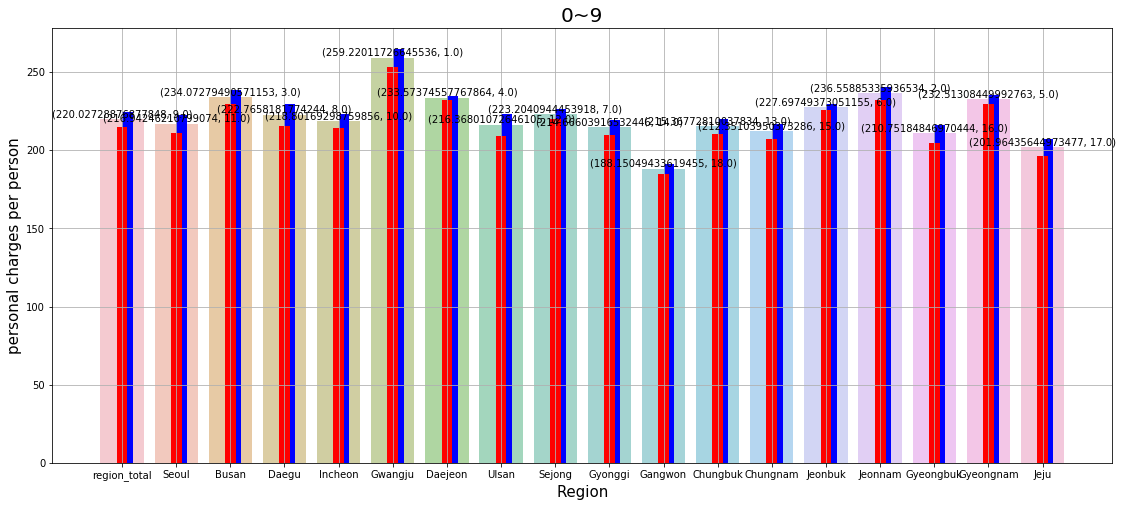

In [90]:
x = list(total_1인당본인부담금_지역.index)
y0 = total_1인당본인부담금_지역['0-9']
r = np.arange(len(x))

tot0 = []
a0 = list(y0)
b0 =  list(y0.rank(ascending = False))
for i in range(len(a0)):
    tot0.append((a0[i], b0[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y0, alpha = 0.5)
plt.title("0~9",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y0[i], tot0[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['0-9'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['0-9'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-3) 10~19세

<BarContainer object of 18 artists>

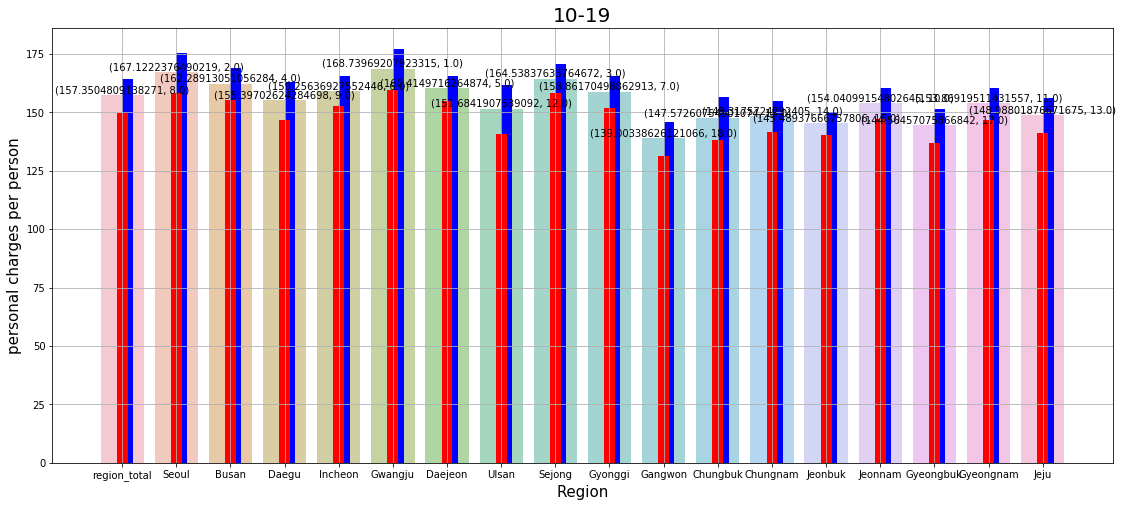

In [91]:
x = list(total_1인당본인부담금_지역.index)
y1 = total_1인당본인부담금_지역['10-19']
r = np.arange(len(x))

tot1 = []
a1 = list(y1)
b1 =  list(y1.rank(ascending = False))
for i in range(len(a1)):
    tot1.append((a1[i], b1[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y1, alpha = 0.5)
plt.title("10-19",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y1[i], tot1[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['10-19'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['10-19'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-4) 20~29세

<BarContainer object of 18 artists>

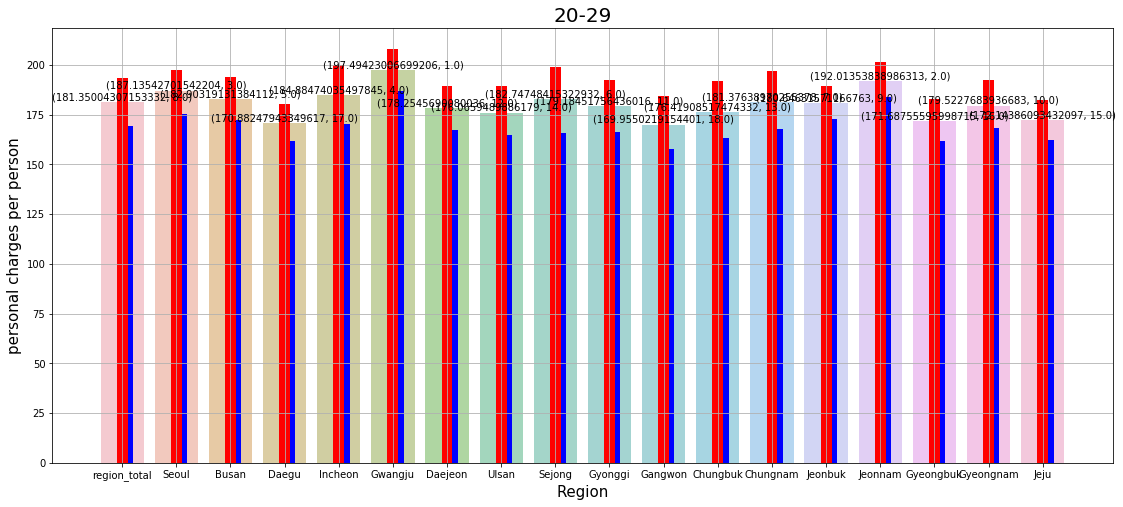

In [92]:
x = list(total_1인당본인부담금_지역.index)
y2 = total_1인당본인부담금_지역['20-29']
r = np.arange(len(x))

tot2 = []
a2 = list(y2)
b2 =  list(y2.rank(ascending = False))
for i in range(len(a2)):
    tot2.append((a2[i], b2[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y2, alpha = 0.5)
plt.title("20-29",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y2[i], tot2[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['20-29'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['20-29'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-5) 30~39세

<BarContainer object of 18 artists>

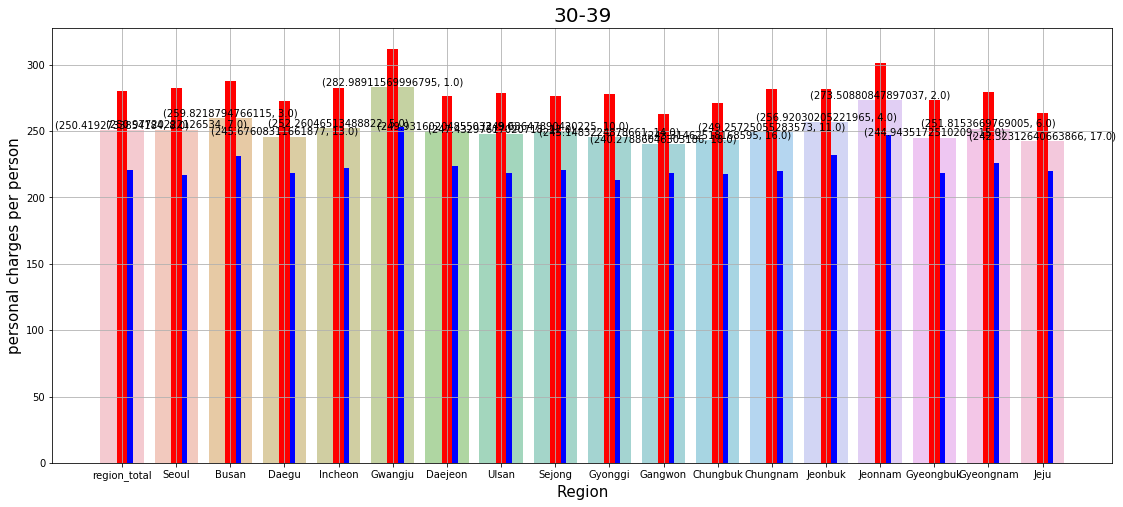

In [93]:
x = list(total_1인당본인부담금_지역.index)
y3 = total_1인당본인부담금_지역['30-39']
r = np.arange(len(x))

tot3 = []
a3 = list(y3)
b3 =  list(y3.rank(ascending = False))
for i in range(len(a3)):
    tot3.append((a3[i], b3[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y3, alpha = 0.5)
plt.title("30-39",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y3[i], tot3[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['30-39'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['30-39'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-6) 40~49세

<BarContainer object of 18 artists>

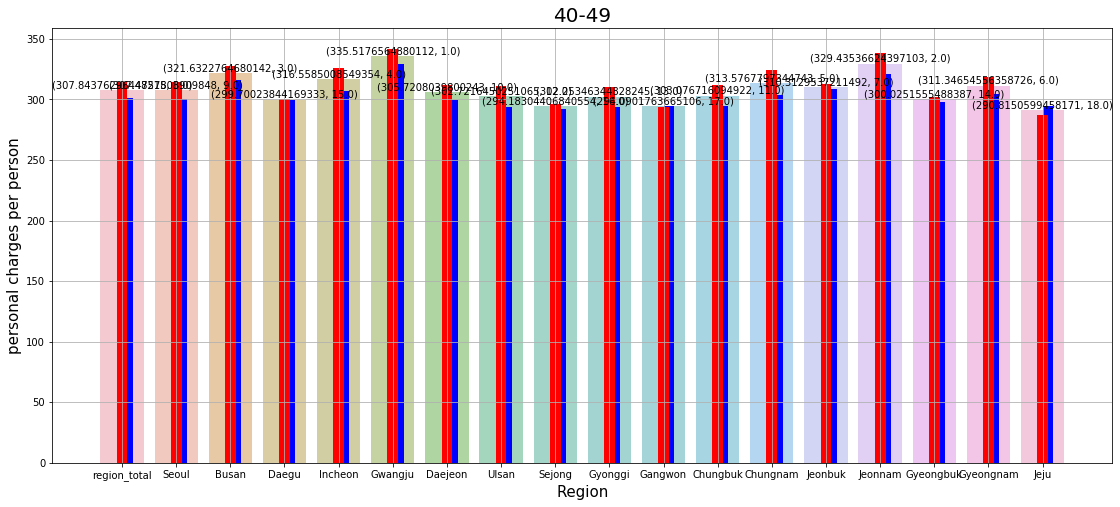

In [94]:
x = list(total_1인당본인부담금_지역.index)
y4 = total_1인당본인부담금_지역['40-49']
r = np.arange(len(x))

tot4 = []
a4 = list(y4)
b4 =  list(y4.rank(ascending = False))
for i in range(len(a4)):
    tot4.append((a4[i], b4[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y4, alpha = 0.5)
plt.title("40-49",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y4[i], tot4[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['40-49'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['40-49'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-7) 50~59세

<BarContainer object of 18 artists>

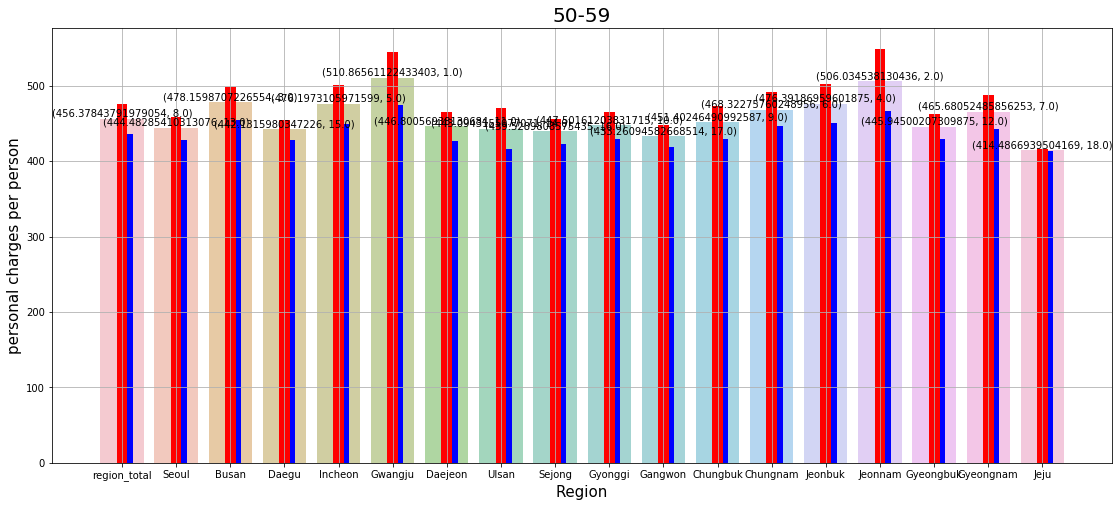

In [95]:
x = list(total_1인당본인부담금_지역.index)
y5 = total_1인당본인부담금_지역['50-59']
r = np.arange(len(x))

tot5 = []
a5 = list(y5)
b5 =  list(y5.rank(ascending = False))
for i in range(len(a5)):
    tot5.append((a5[i], b5[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y5, alpha = 0.5)
plt.title("50-59",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y5[i], tot5[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['50-59'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['50-59'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-8) 60~69세

<BarContainer object of 18 artists>

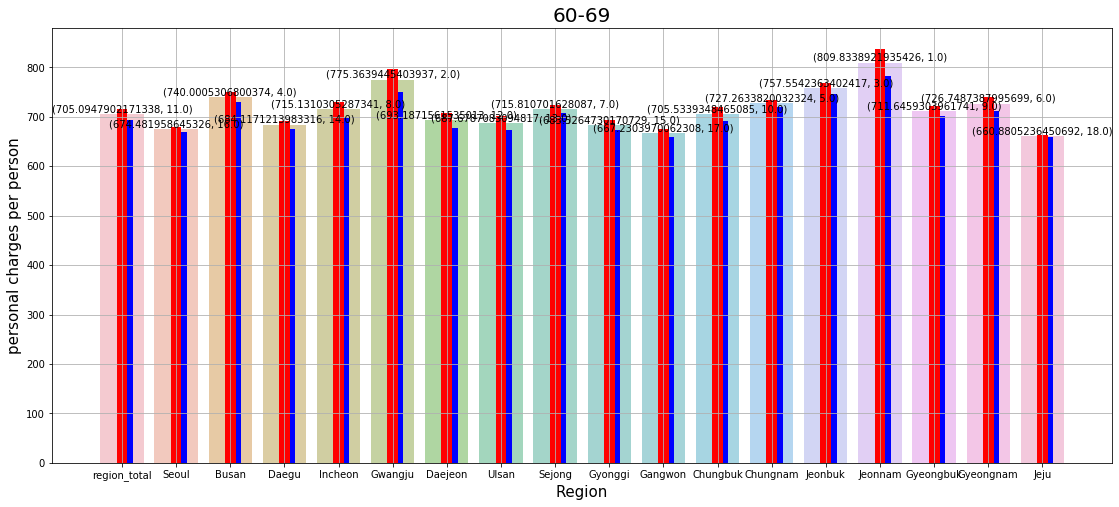

In [96]:
x = list(total_1인당본인부담금_지역.index)
y6 = total_1인당본인부담금_지역['60-69']
r = np.arange(len(x))

tot6 = []
a6 = list(y6)
b6 =  list(y6.rank(ascending = False))
for i in range(len(a6)):
    tot6.append((a6[i], b6[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y6, alpha = 0.5)
plt.title("60-69",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y6[i], tot6[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['60-69'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['60-69'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-9) 70~70세

<BarContainer object of 18 artists>

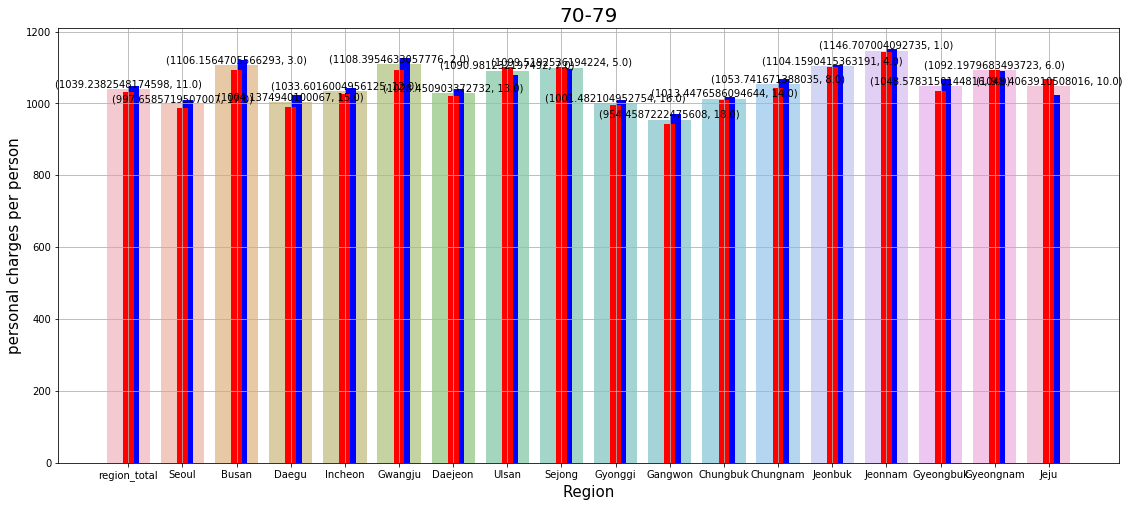

In [97]:
x = list(total_1인당본인부담금_지역.index)
y7 = total_1인당본인부담금_지역['70-79']
r = np.arange(len(x))

tot7 = []
a7 = list(y7)
b7 =  list(y7.rank(ascending = False))
for i in range(len(a7)):
    tot7.append((a7[i], b7[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y7, alpha = 0.5)
plt.title("70-79",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y7[i], tot7[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['70-79'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['70-79'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

#### 3-10) 80세 이상

<BarContainer object of 18 artists>

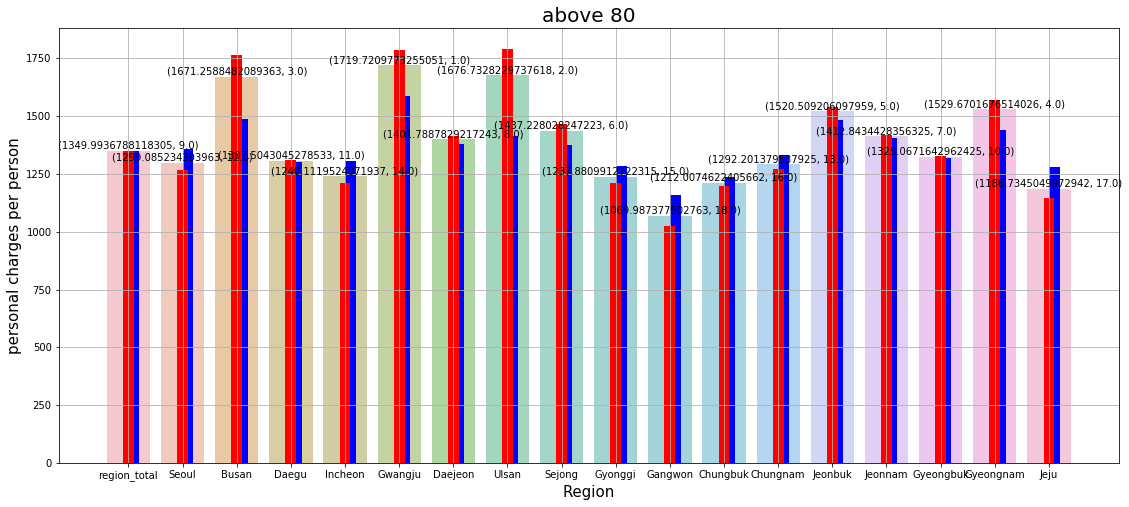

In [98]:
x = list(total_1인당본인부담금_지역.index)
y8 = total_1인당본인부담금_지역['above 80']
r = np.arange(len(x))

tot8 = []
a8 = list(y8)
b8 =  list(y8.rank(ascending = False))
for i in range(len(a8)):
    tot8.append((a8[i], b8[i]))

fig = plt.figure(figsize = (19, 8))
sns.barplot(x=r,y=y8, alpha = 0.5)
plt.title("above 80",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("personal charges per person",fontsize=15)
plt.grid(True)
    
for i, v in enumerate(r):
    plt.text(v, y8[i], tot8[i], horizontalalignment = 'center',
             verticalalignment = 'bottom')
    
plt.xticks(r, x)

bar_width = 0.2
plt.bar(x = x, height = total_1인당본인부담금_지역_male['above 80'],
            data = total_1인당본인부담금_지역_male, width = bar_width, align = 'edge', color = 'blue')
plt.bar(x = x, height = total_1인당본인부담금_지역_female['above 80'],
            data = total_1인당본인부담금_지역_female, width = bar_width, align = 'center', color = 'red')

## (3) 의료보장적용인구
#### -Population Medical Security와 연관시키기

### 1) 데이터 불러오기

#### 1-1) 의료보장 적용 인구 data

In [99]:
pop_data=pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '10p_인구')

pop_data=pop_data.dropna()
pop_data.index=new_index

for col in pop_data.columns:
    if not col=='Unnamed: 1':
        del pop_data[col]
pop_data.columns=['Population']

#### 1-2) 의료 시스템 data 

요양기관(병원포함), 의료인력, 의료장비, 병상, 병실을 의료시스템이라고 두겠습니다.

In [100]:
dat1 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '18p심평원', header = [4])
dat1 = dat1.dropna()
t1 = dat1[['구      분', '계\nTotal']]
t1.columns = ['구분', '요양기관']

dat2 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '20p', header = [4, 5])
dat2 = dat2.dropna()
t2 = dat2[[('구   분', 'Unnamed: 0_level_1'), ('                                계\nTotal', 'Unnamed: 1_level_1')]]
t2.columns = ['구분', '의료인력']

dat3 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '22p', header = [4, 5, 6])
dat3 = dat3.dropna()
t3 = dat3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'), 
           ('계                                          Total', 'Unnamed: 1_level_1', '병실  Ward'),
           ('계                                          Total', 'Unnamed: 2_level_1', '병상  Bed')]]

t4 = t3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
         ('계                                          Total', 'Unnamed: 1_level_1', '병실  Ward')]]
t4.columns = ['구분', '주요시설_병실']

t5 = t3[[('구   분', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
         ('계                                          Total', 'Unnamed: 2_level_1', '병상  Bed')]]
t5.columns = ['구분', '주요시설_병상']

dat4 = pd.read_excel('00_시도별 공통(1-4권)_2019.xlsx', sheet_name = '24p', header = [4])
dat4 = dat4.dropna()
t6 = dat4[['구   분', '계\nTotal']]
t6.columns = ['구분', '주요_의료장비']

#### 1-3) total 의료시스템

요양기관-Care Institutions\
의료인력-Medical Personnel\
병실-Ward\
병상-Bed\
의료장비-Medical Equipments

In [164]:
total = pd.merge(t1, t2 , on = '구분')
total = pd.merge(total, t4, on = '구분')
total = pd.merge(total, t5, on = '구분')
total = pd.merge(total, t6, on = '구분')
total.index=new_index
del total['구분']

medical_columns=['Care Institutions','Medical Personnel','Ward','Bed','Medical Equipments']
total.columns=medical_columns

total_no_Total=total.drop('Total')

new_index_no_Total=['Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyonggi','Gangwon',
          'Chungbuk','Chungnam','Jeonbuk','Jeonnam','Gyeongbuk','Gyeongnam','Jeju']

total.index=renew_index

### 2) 지역별 의료시스템의 개수

#### 2-1) Care Institutions

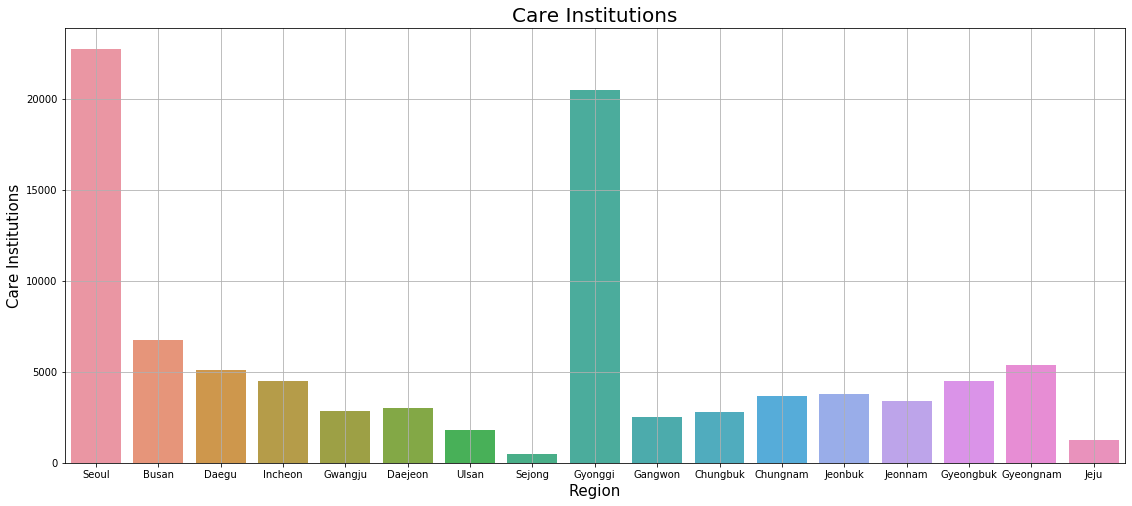

In [152]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Care Institutions'] )
plt.title('Care Institutions',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions',fontsize=15)
plt.grid(True)

#### 2-2) Medical Personnel

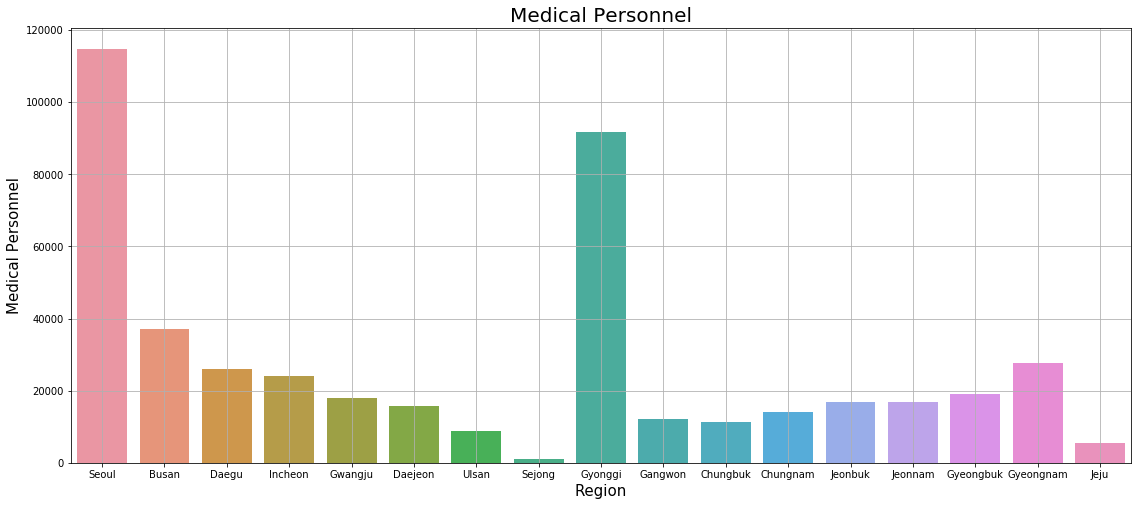

In [153]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Medical Personnel'] )
plt.title('Medical Personnel',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel',fontsize=15)
plt.grid(True)

#### 2-3) Ward

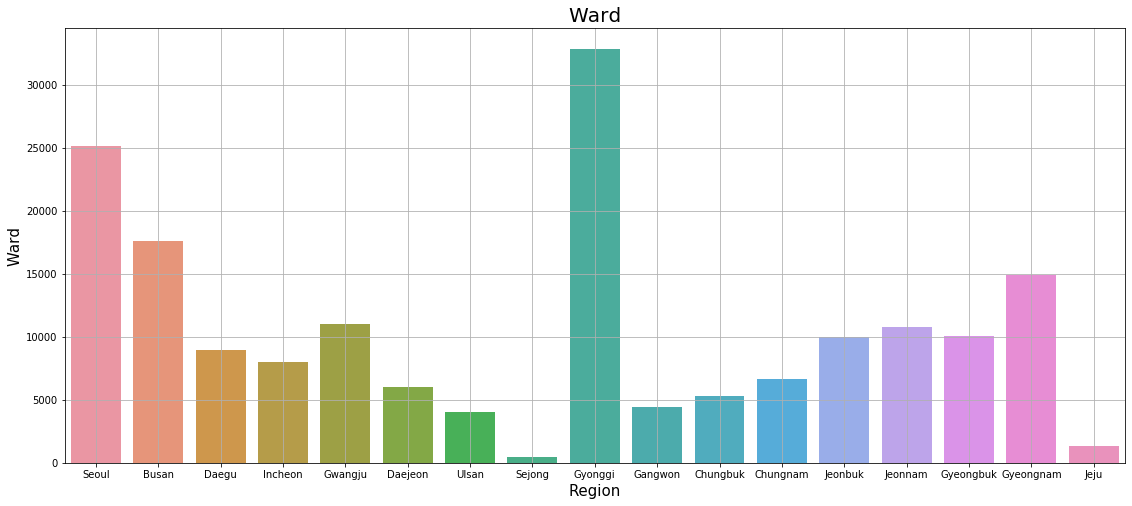

In [209]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Ward'] )
plt.title('Ward',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Ward',fontsize=15)
plt.grid(True)

#### 2-4) Bed

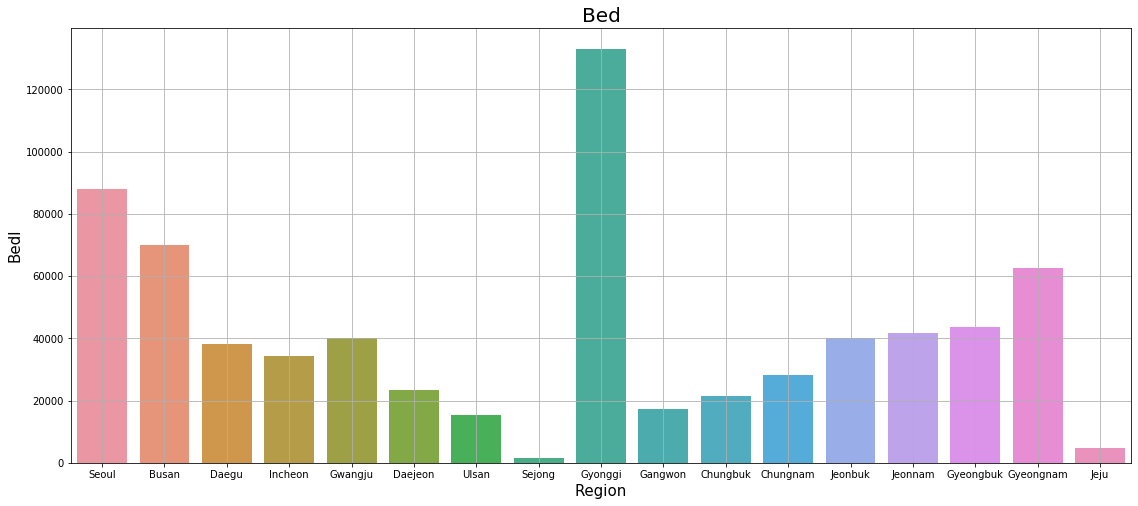

In [155]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Bed'] )
plt.title('Bed',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Bedl',fontsize=15)
plt.grid(True)


#### 2-5) Medical Equipments

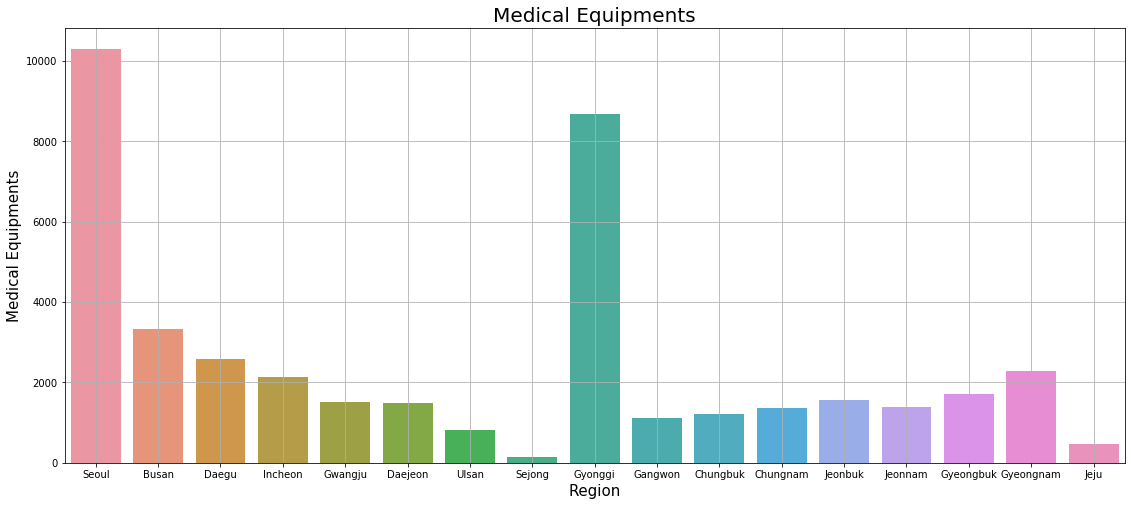

In [156]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total_no_Total.index,y=total_no_Total['Medical Equipments'] )
plt.title('Medical Equipments',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments',fontsize=15)
plt.grid(True)

위의 그래프들을 보면 서울과 경기가 의료시스템의 수가 많고 세종과 제주는 의료시스템의 수가 적다는 사실을 알 수 있습니다. \
그러나 이는 지역의 인구수를 고려하지 않았기 때문에 단순히 '서울과 경기의 의료시스템이 좋다.'라고는 말할 수 없습니다. \
따라서 보험료가 잘 사용되고 있는 지역이라는 주제의 답을 찾기 위해 1인당 의료시스템 사용가능 수를 구했습니다.

## (4) 1인당 의료시스템 사용가능 수

1인당 의료시스템 사용가능 수 = 의료시스템 수 / 지역인구 수 \
위의 식에 따라 해당 값이 높을 수록 해당 지역의 의료시스템의 질이 높다는 것을 의미합니다.\
\
이름이 너무 긴 관계로 '지역의료수준'이라고 칭하겠습니다.

### 1) 지역의료수준

In [169]:
total1=total

population=pop_data.to_numpy()

Care_Institutions=total.to_numpy()[:,[0]]
Medical_Personnel=total.to_numpy()[:,[1]]
Ward=total.to_numpy()[:,[2]]
Bed=total.to_numpy()[:,[3]]
Medical_Equipments=total.to_numpy()[:,[4]]

In [174]:
total1['Care Institutions']=Care_Institutions/population
total1['Medical Personnel']=Medical_Personnel/population
total1['Ward']=Ward/population
total1['Bed']=Bed/population
total1['Medical Equipments']=Medical_Equipments/population

### 2) 지역의료수준의 총합

Text(0, 0.5, 'Medical System per person')

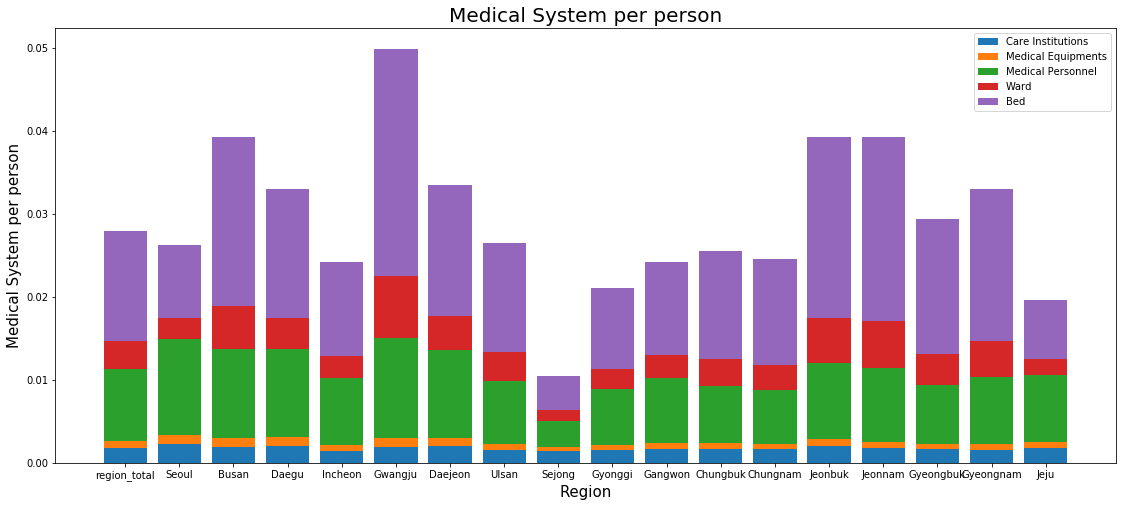

In [175]:
plt.figure(figsize=(19, 8))
x=total1.index
p1 = plt.bar(x, total1['Care Institutions'])
p2 = plt.bar(x, total1['Medical Equipments'], bottom = total1['Care Institutions'])
p3 = plt.bar(x, total1['Medical Personnel'], bottom = total1['Medical Equipments']+total1['Care Institutions'])
p4 = plt.bar(x, total1['Ward'], bottom = total1['Medical Personnel']+total1['Medical Equipments']+total1['Care Institutions'])
p5 = plt.bar(x, total1['Bed'], bottom = total1['Ward']+total1['Medical Personnel']+total1['Medical Equipments']+total1['Care Institutions'])
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Care Institutions','Medical Equipments','Medical Personnel','Ward','Bed'))
plt.title('Medical System per person',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical System per person',fontsize=15)

그래프를 통해 수치가 높으면 지역의료수준이 높고, 낮으면 지역의료수준이 낮다는 것을 직관적으로 파악할 수 있습니다. \
그러나 각각의 지역의료수준의 가치는 다르다고 판단하였기에 아래에 각각에 대한 그래프를 추가하였습니다.

### 3) 각각의 의료시스템에 대한 지역의료수준

사람들이 많이 모여사는 지역일수록 의료의 인프라가 잘 구축되어있는 것이 당연하기에 각 그래프를 해석하는데 있어 서울,부산,대구,인천,광주,대전,울산,세종,제주가 해당되는 광역시와 특별시를 한 그룹으로, 그 외를 한 그룹으로 묶어서 해석하였습니다.

#### 3-1) Care Institutions per peron

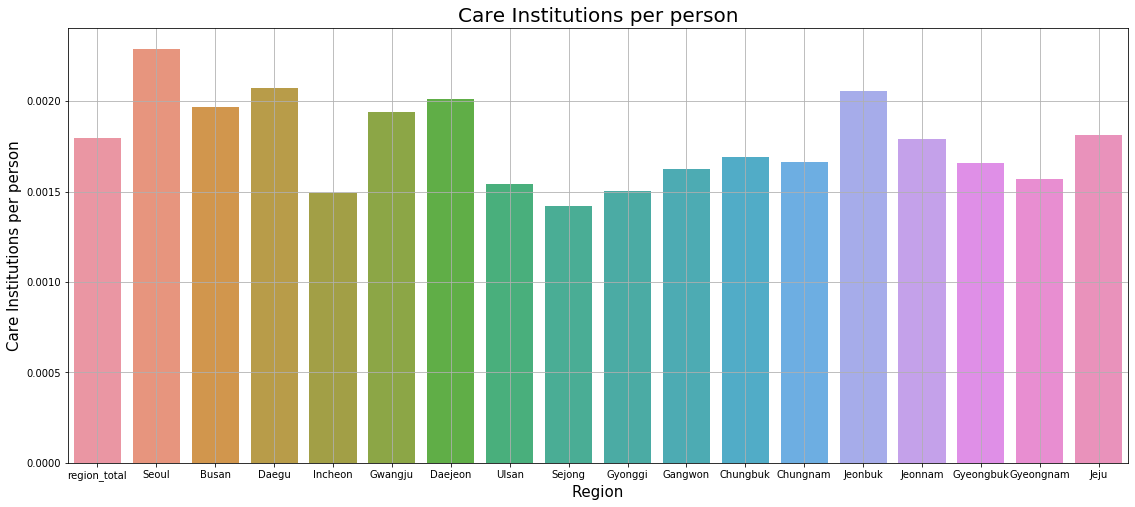

In [177]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Care Institutions'] )
plt.title('Care Institutions per person',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions per person',fontsize=15)
plt.grid(True)

요양기관은 광역시와 특별시 중에서 [인천, 울산, 세종]이 낮게 나오고\
그 외 지역 중에서는 [전북]이 높게 나왔습니다.

#### 3-2) Medical Equipments per person

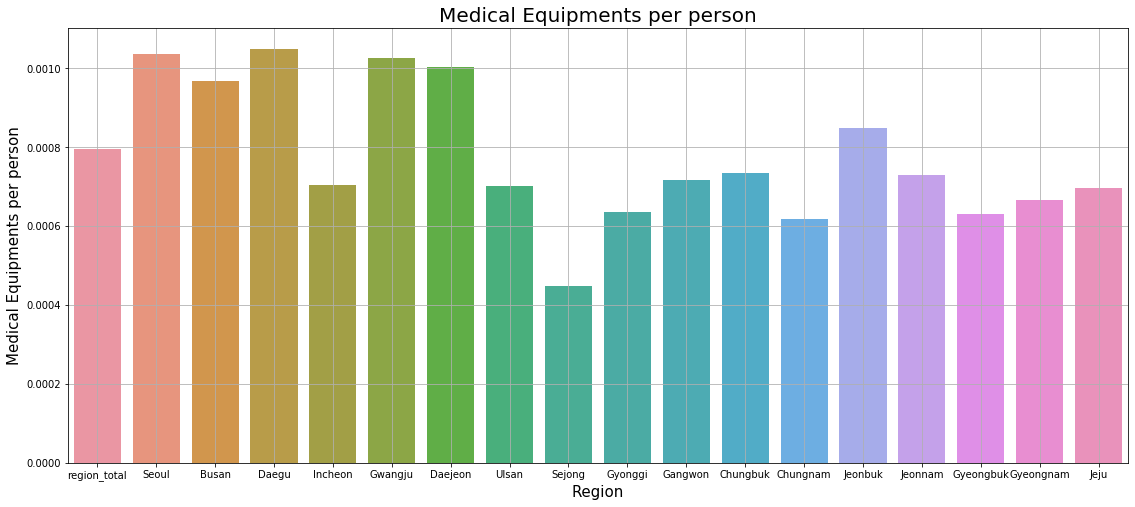

In [178]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Equipments'] )
plt.title('Medical Equipments per person',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments per person',fontsize=15)
plt.grid(True)

의료기기는 광역시와 특별시 중에서 [인천, 울산, 세종]이 낮게 나오고\
그 외 지역 중에서는 [전북]이 높게 나왔습니다.

#### 3-3) Medical Personnel per peron

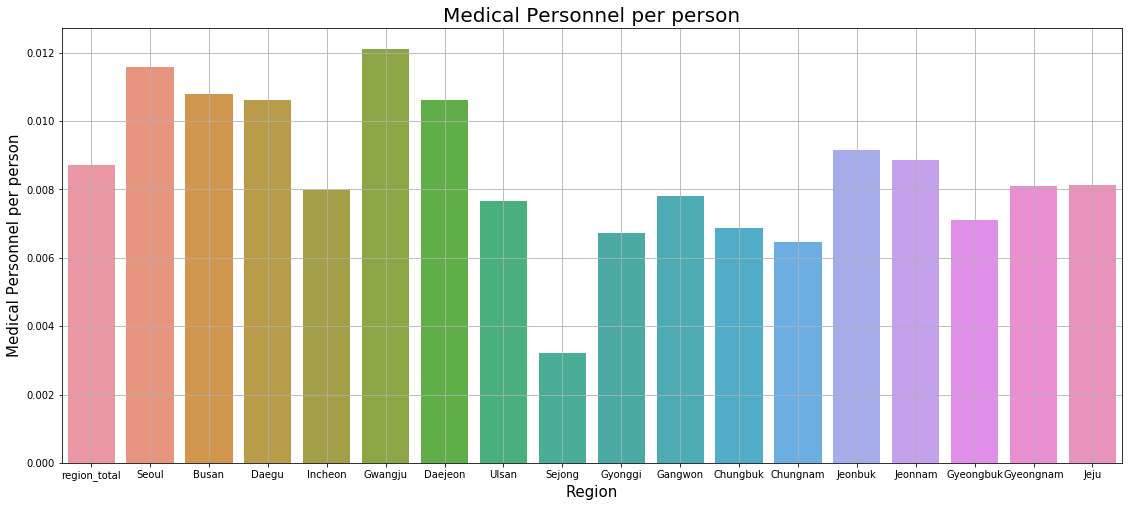

In [179]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Personnel'] )
plt.title('Medical Personnel per person',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel per person',fontsize=15)
plt.grid(True)

의료인력은 광역시와 특별시 중에서 [인천, 울산, 세종, 제주]가 높게 나오고\
그 외 지역 중에서는 [전북]이 높게 나왔습니다다.

#### 3-4) Ward per person

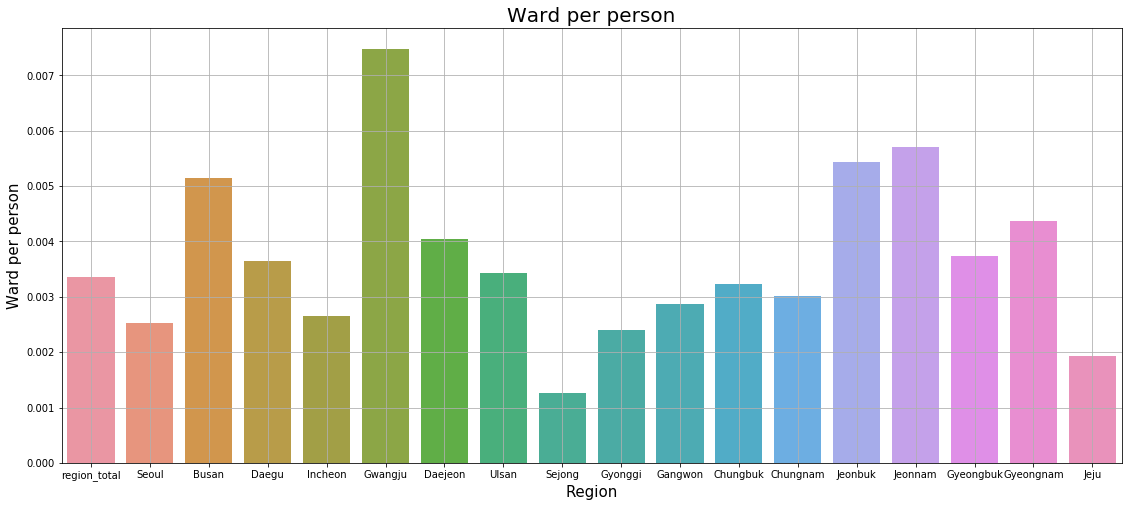

In [180]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Ward'] )
plt.title('Ward per person',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Ward per person',fontsize=15)
plt.grid(True)

병실은 광역시와 특별시 중에서 [세종]이 앞에서와 비슷하게 낮게 나오고\
그 외 지역 중에서는 [전남]이 가장 높지만 [전북]도 높게 나왔습니다.\
그러나 광역시와 특별시 중 [부산, 광주]를 제외한 나머지 지역은 많이 낮게 나왔습니다. 

#### 3-5) Bed per peron

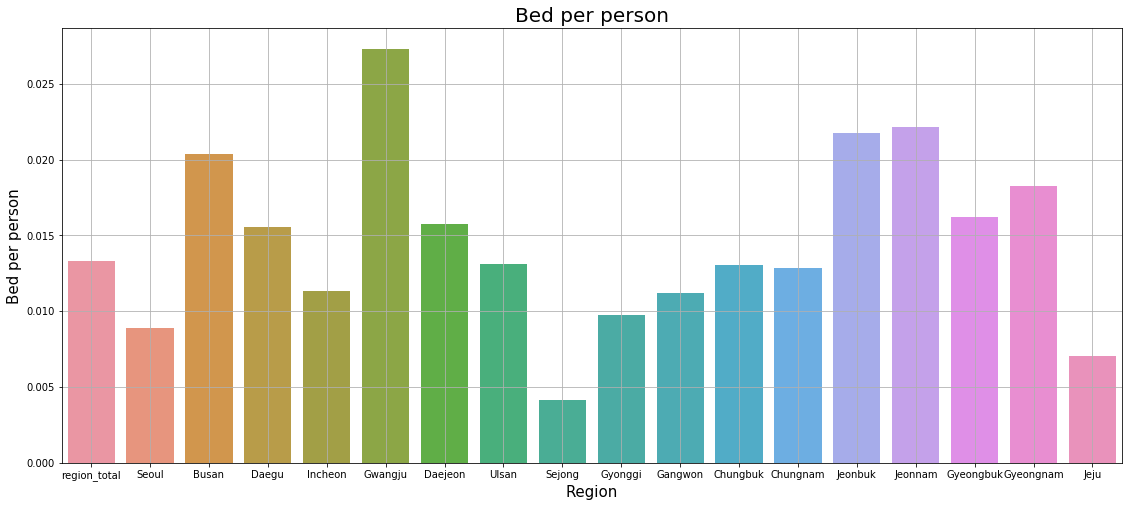

In [181]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Bed'] )
plt.title('Bed per person',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Bed per person',fontsize=15)
plt.grid(True)

병상 또한 병실과 비슷한 결과입니다.

#### 3-conclusion)

요양기관, 의료기기, 의료인력 부분에서는 광역시와 특별시 중 대체적으로 [인천, 울산, 세종]이 낮게 나오고\
그 외 지역에서는 [전북]이 높게 나왔습니다.
이는 [인천, 울산, 세종]의 의료시스템이 상대적으로 좋지 않으며\
그 외 지역 중에서는 [전북]이 의료시스템이 상대적으로 좋다는 사실을 알게 되었습니다.\
\
그리고 병상과 병실 부분에서는 광역시와 특별시 중에서 [부산, 광주]를 제외하면 다른 지역들은 병상과 병실이 부족하다는 사실을 알게 되었습니다. 그리고 그 외 지역 중에서는 [전북, 전남]이 병상과 병실이 많다는 사실을 알게 되었습니다.

위 각각의 의료시스템에 대한 지역의료수준 분석을 통해 \
광역시와 특별시 - [인천, 울산, 세종]은 의료시스템이 좋지 않고 [부산, 광주]를 제외한 지역은 병상과 병실이 부족함. \
그 외 지역-대체적으로 [전북]이 의료시스템이 좋음. \
이라는 결과를 얻게 되었습니다.

## (5) 지역의료수준/1인당 본인부담금
이 값이 높을수록 1인당 부담하는 금액에 비해 그 지역의 의료수준이 상대적으로 좋다는 것을 의미합니다. \
즉 '내가 내고 있는 보험금이 잘 쓰이고 있다'는 것을 의미합니다.


### 1) Care Institutions

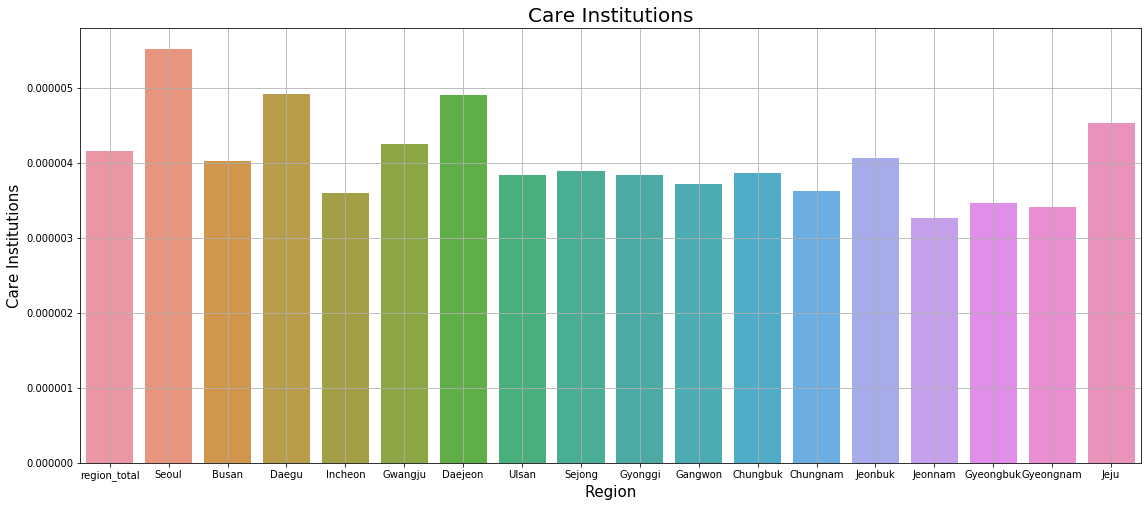

In [185]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Care Institutions']/total_1인당본인부담금_지역['age_total'] )
plt.title('Care Institutions',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions',fontsize=15)
plt.grid(True)

요양기관에서는 본인부담금을 [서울,대구,대전,제주]가 잘 쓰고 있다고 할 수 있습니다.

### 2) Medical Equipments

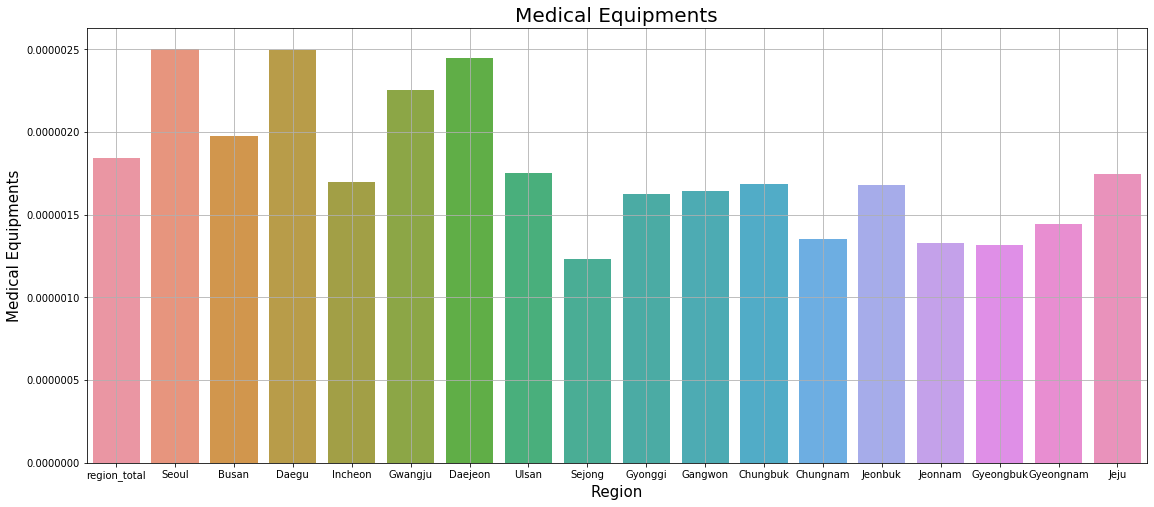

In [188]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Equipments']/total_1인당본인부담금_지역['age_total'] )
plt.title('Medical Equipments',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments',fontsize=15)
plt.grid(True)

의료장비에서는 본인부담금을 [서울,대구,대전]이 잘 쓰고 [세종]이 잘 못 쓰고 있다고 할 수 있습니다.

### 3) Medical Personnel

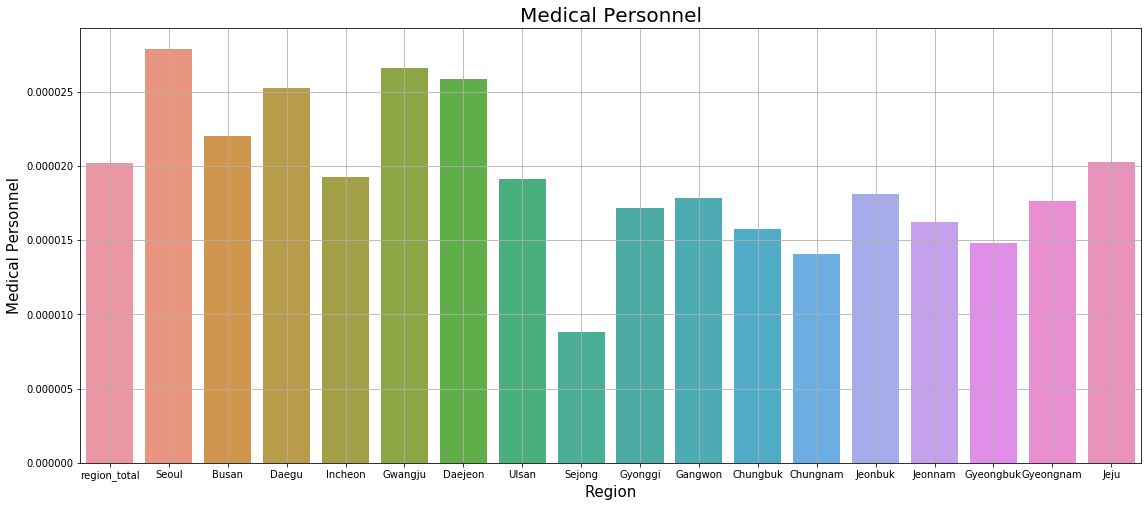

In [190]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Personnel']/total_1인당본인부담금_지역['age_total'] )
plt.title('Medical Personnel',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel',fontsize=15)
plt.grid(True)

의료인력에서는 본인부담금을 [서울,광주,대전]이 잘 쓰고 [세종]이 잘 못 쓰고 있다고 할 수 있습니다.

### 4) Ward

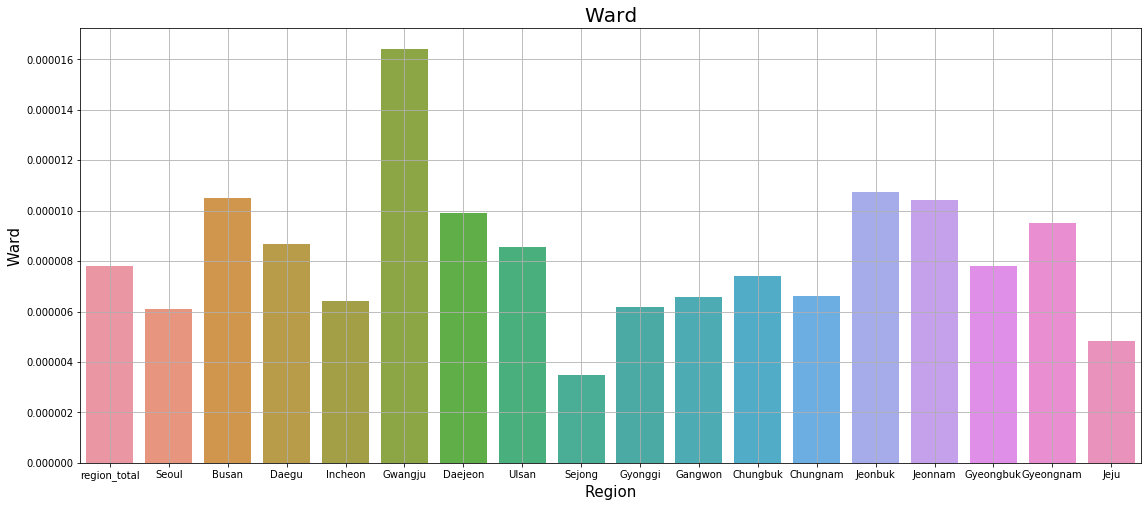

In [191]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Ward']/total_1인당본인부담금_지역['age_total'] )
plt.title('Ward',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Ward',fontsize=15)
plt.grid(True)

### 5) Bed

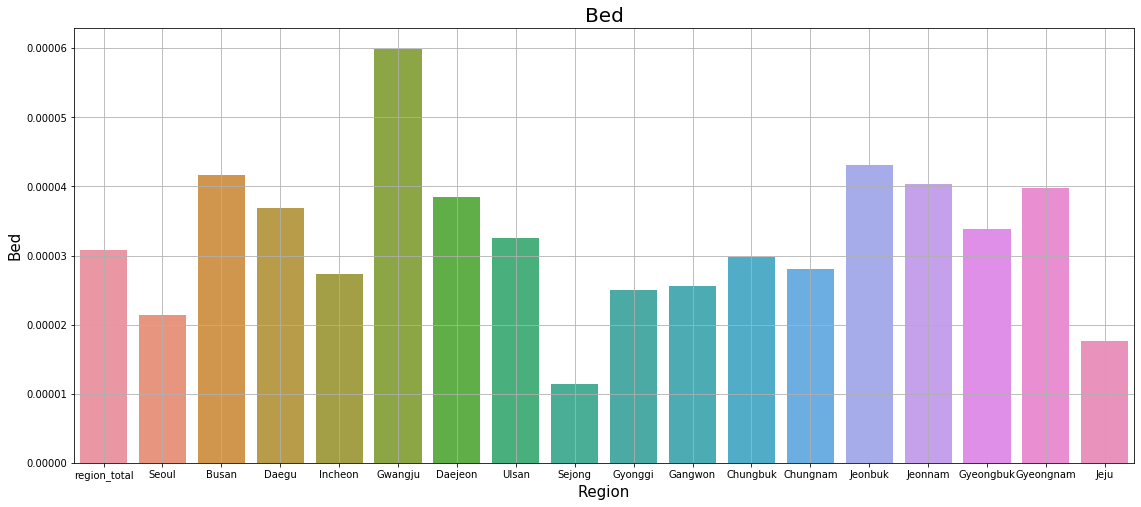

In [192]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Bed']/total_1인당본인부담금_지역['age_total'] )
plt.title('Bed',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Bed',fontsize=15)
plt.grid(True)

병상과 병실은 그 분포가 다양하지만 대표적으로 [광주]가 본인부담금을 잘 쓰고 있고, [세종,제주]가 잘 못 쓰고 있습니다.

---

개인적으로 판단하였을 때 병실과 병상은 그 지역의 의료시스템에 큰 영향을 미치지 않는다고 판단하였습니다. \
따라서 앞으로의 분석에는 병상과 병실은 제외하고 진행하겠습니다.

## (6) 나이에 따른 '지역의료수준/ 1인당 본인부담금'
(5)에서는 '지역의료수준/1인당 본인부담금'을 계산했다면 여기서는 '지역의료수준/나이별 1인당 본인부담금'을 계산하여 (2)-3)에서 하고자 하였던 자신이 속한 그룹은 보험료를 잘 사용하고 있는지를 알아보고자 합니다.\
\
모든 나이대를 다루고 싶었지만 그래프의 수가 많아지기도 하고, 분산이 차이가 안 나기에 무의미한 데이터들가 도출될 것이라 예상하여 나이별 본인부담금이 지역별로 넓게 분포되어 있는 나이대를 분석하기로 했습니다.\
(분산이 높은 데이터 3개)\
각각의 연령에 따른 분산은 아래에서 계산하도록 하겠습니다.

### 1) 분산 구하기

In [194]:
print('0~9세 분산 :', np.var(total_1인당본인부담금_지역['0-9']/total_1인당본인부담금_지역['0-9'].mean()))
print('10~19세 분산 :', np.var(total_1인당본인부담금_지역['10-19']/total_1인당본인부담금_지역['10-19'].mean()))
print('20~29세 분산 :', np.var(total_1인당본인부담금_지역['20-29']/total_1인당본인부담금_지역['20-29'].mean()))
print('30~39세 분산 :', np.var(total_1인당본인부담금_지역['30-39']/total_1인당본인부담금_지역['30-39'].mean()))
print('40~49세 분산 :', np.var(total_1인당본인부담금_지역['40-49']/total_1인당본인부담금_지역['40-49'].mean()))
print('50~59세 분산 :', np.var(total_1인당본인부담금_지역['50-59']/total_1인당본인부담금_지역['50-59'].mean()))
print('60~69세 분산 :', np.var(total_1인당본인부담금_지역['60-69']/total_1인당본인부담금_지역['60-69'].mean()))
print('70~79세 분산 :', np.var(total_1인당본인부담금_지역['70-79']/total_1인당본인부담금_지역['70-79'].mean()))
print('80세 이상 분산 :', np.var(total_1인당본인부담금_지역['above 80']/total_1인당본인부담금_지역['above 80'].mean()))


0~9세 분산 : 0.004478781161152696
10~19세 분산 : 0.0026685010804183723
20~29세 분산 : 0.0015236173797423035
30~39세 분산 : 0.0017433996888084934
40~49세 분산 : 0.0014195511550061874
50~59세 분산 : 0.0027191552862897176
60~69세 분산 : 0.0027873198434964666
70~79세 분산 : 0.0021509112110178804
80세 이상 분산 : 0.016270470272040014


상위 3인 0-9세, 60-69세, 80세이상 에 대해서만 분석하도록 하겠습니다.

### 2) Care Institutions

#### 2-1) 0~9세

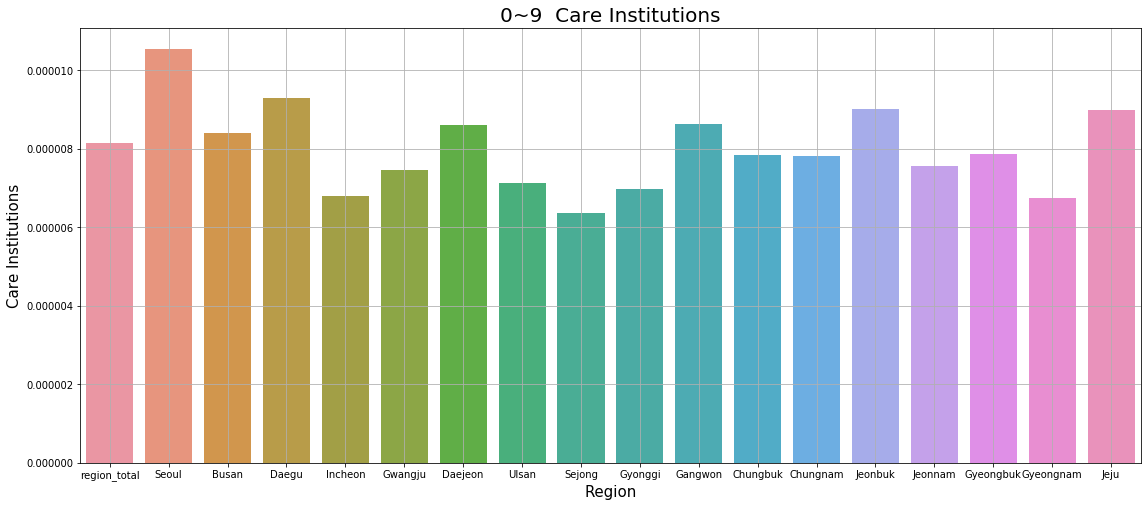

In [196]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Care Institutions']/total_1인당본인부담금_지역['0-9'] )
plt.title('0~9  Care Institutions',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions',fontsize=15)
plt.grid(True)

#### 2-2) 60~69세

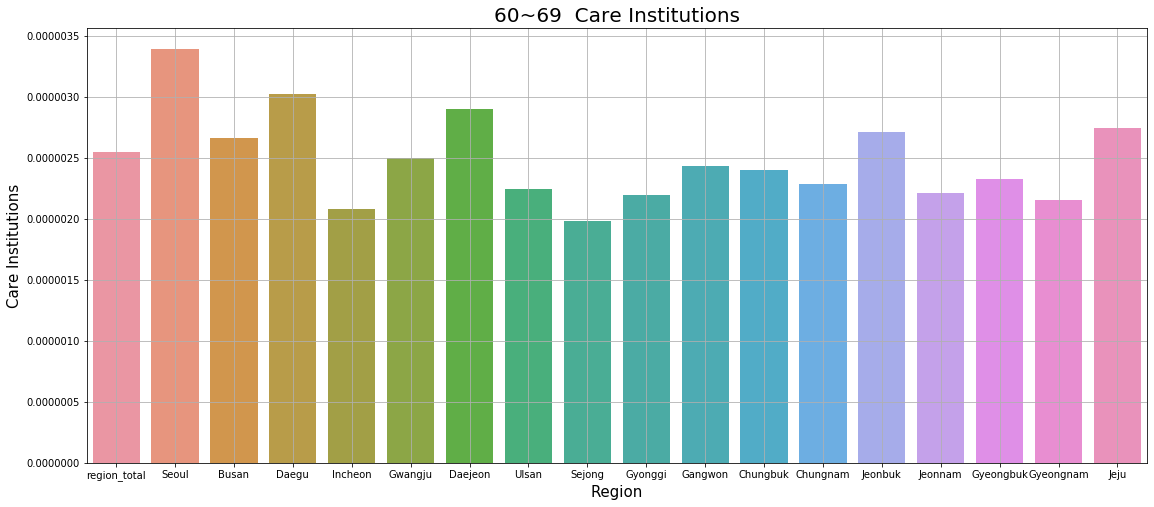

In [197]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Care Institutions']/total_1인당본인부담금_지역['60-69'] )
plt.title('60~69  Care Institutions',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions',fontsize=15)
plt.grid(True)

#### 2-3) 80세 이상 

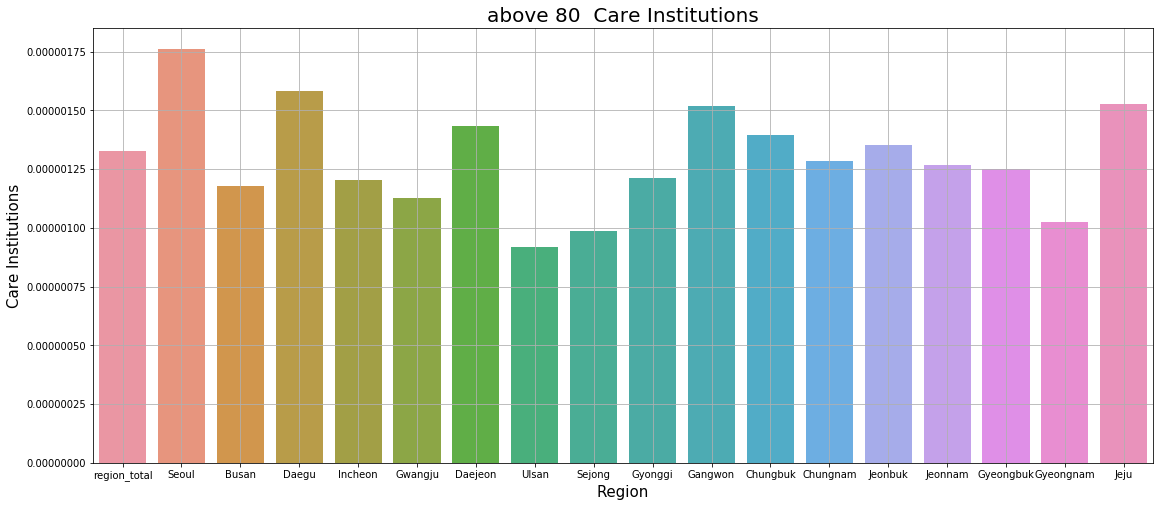

In [198]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Care Institutions']/total_1인당본인부담금_지역['above 80'] )
plt.title('above 80  Care Institutions',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Care Institutions',fontsize=15)
plt.grid(True)

### 3) Medical Personnel

#### 3-1) 0~9세

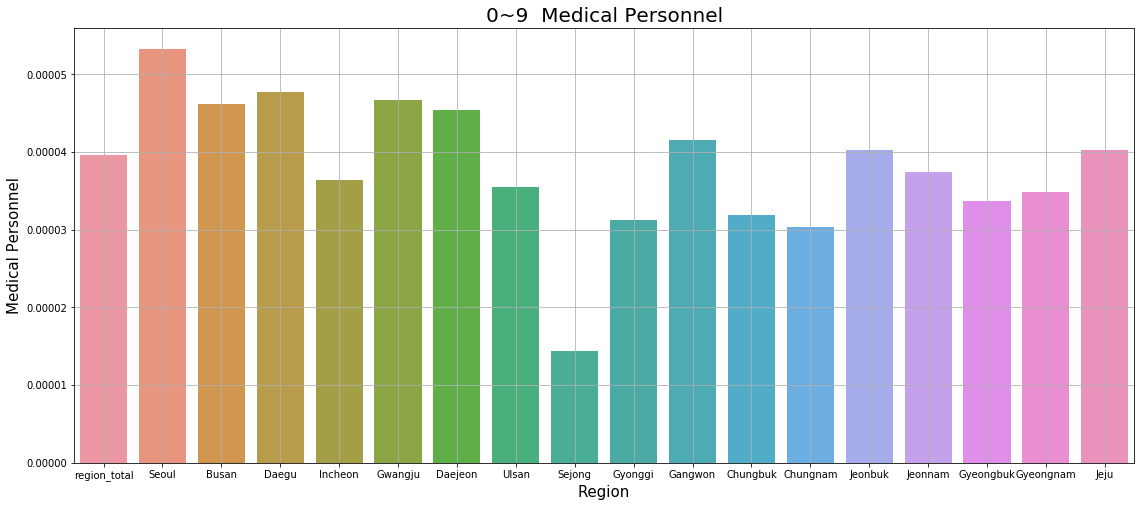

In [200]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Personnel']/total_1인당본인부담금_지역['0-9'] )
plt.title('0~9  Medical Personnel',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel',fontsize=15)
plt.grid(True)

#### 3-2) 60~69세

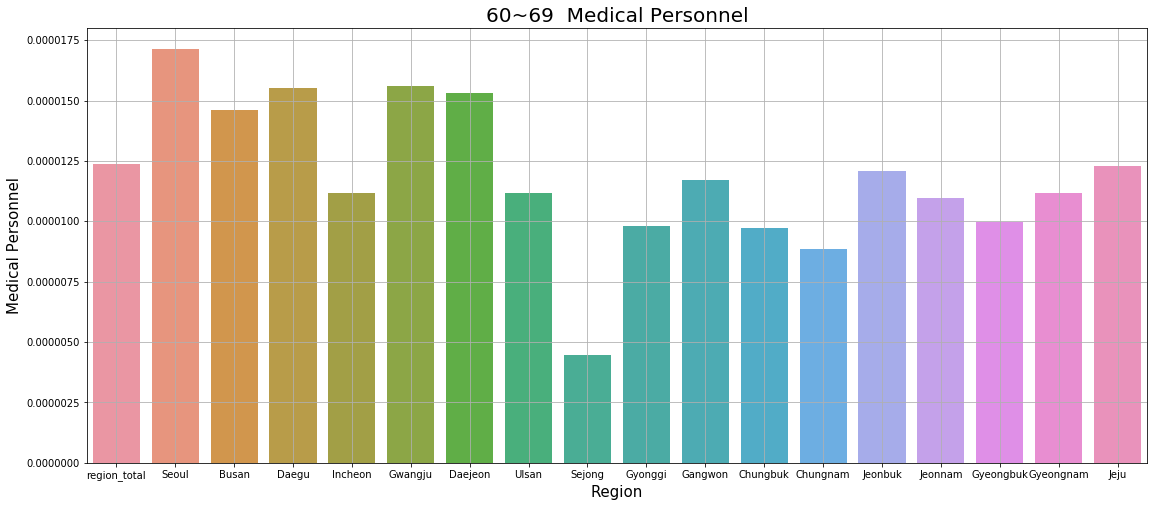

In [201]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Personnel']/total_1인당본인부담금_지역['60-69'] )
plt.title('60~69  Medical Personnel',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel',fontsize=15)
plt.grid(True)

#### 3-3) 80세 이상

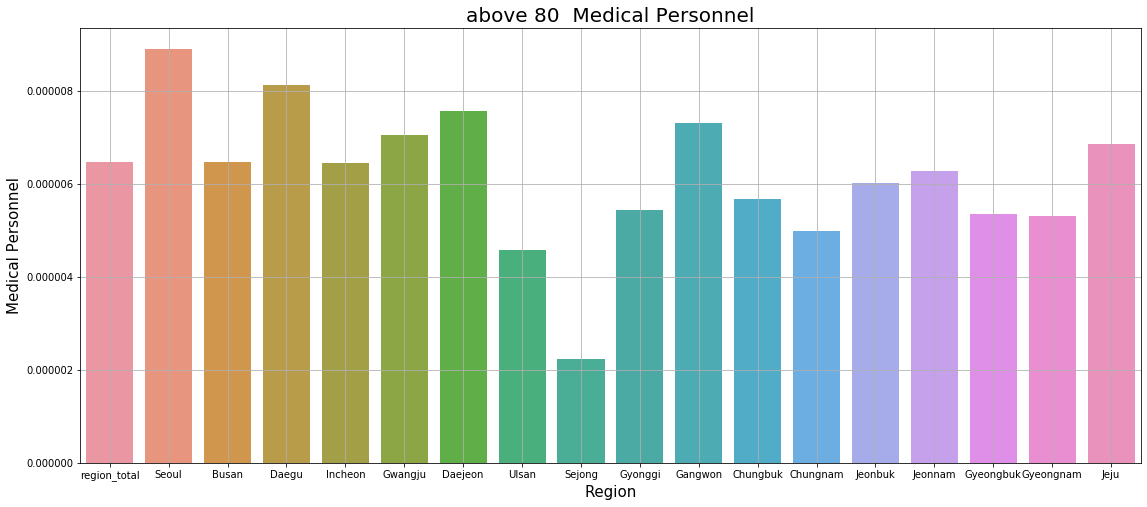

In [202]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Personnel']/total_1인당본인부담금_지역['above 80'] )
plt.title('above 80  Medical Personnel',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Personnel',fontsize=15)
plt.grid(True)

### 4) Medical Equipments

#### 4-1) 0~9세

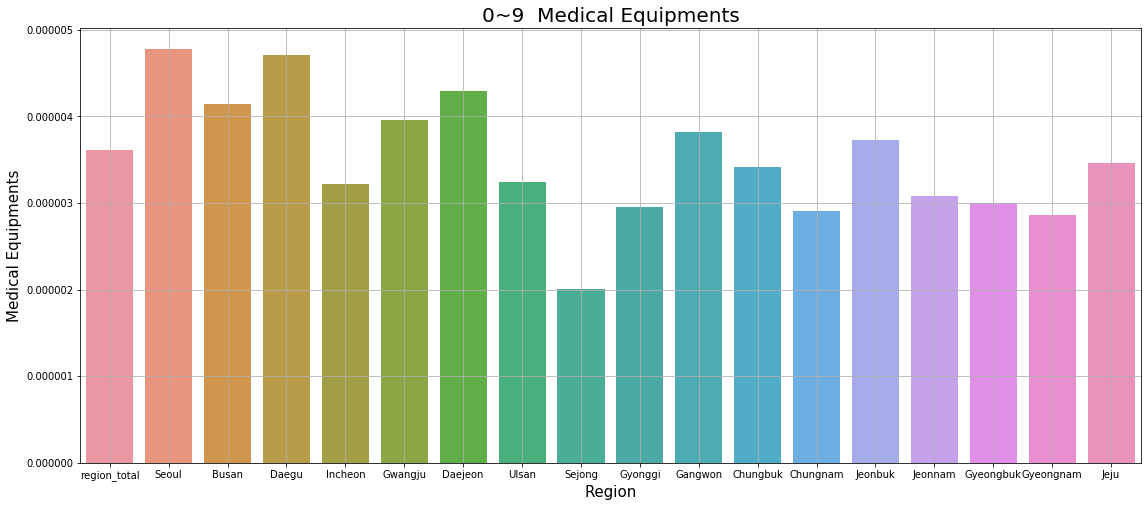

In [203]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Equipments']/total_1인당본인부담금_지역['0-9'] )
plt.title('0~9  Medical Equipments',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments',fontsize=15)
plt.grid(True)

#### 4-2) 60~69세

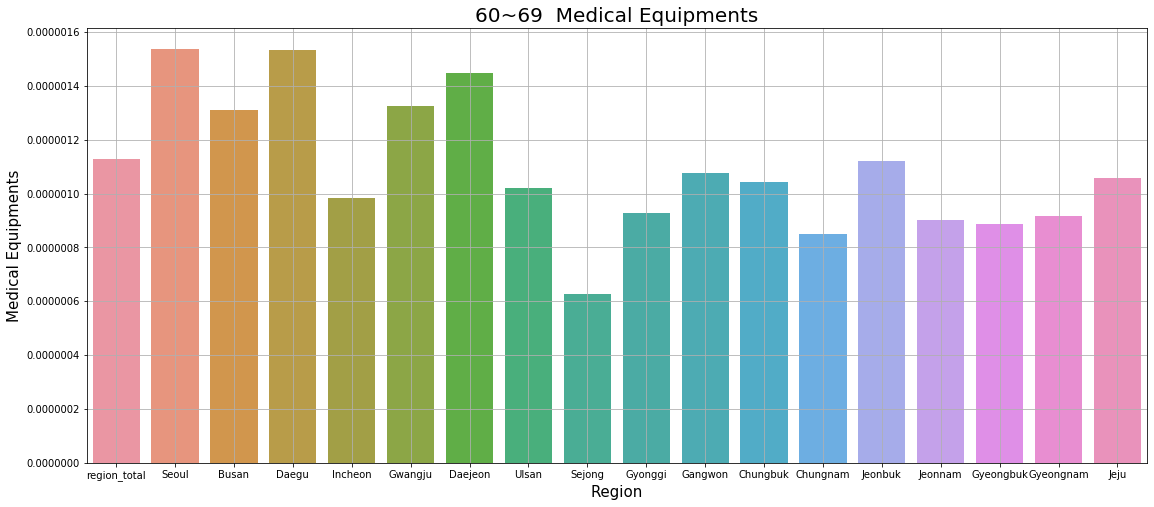

In [204]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Equipments']/total_1인당본인부담금_지역['60-69'] )
plt.title('60~69  Medical Equipments',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments',fontsize=15)
plt.grid(True)

#### 4-3) 80세 이상

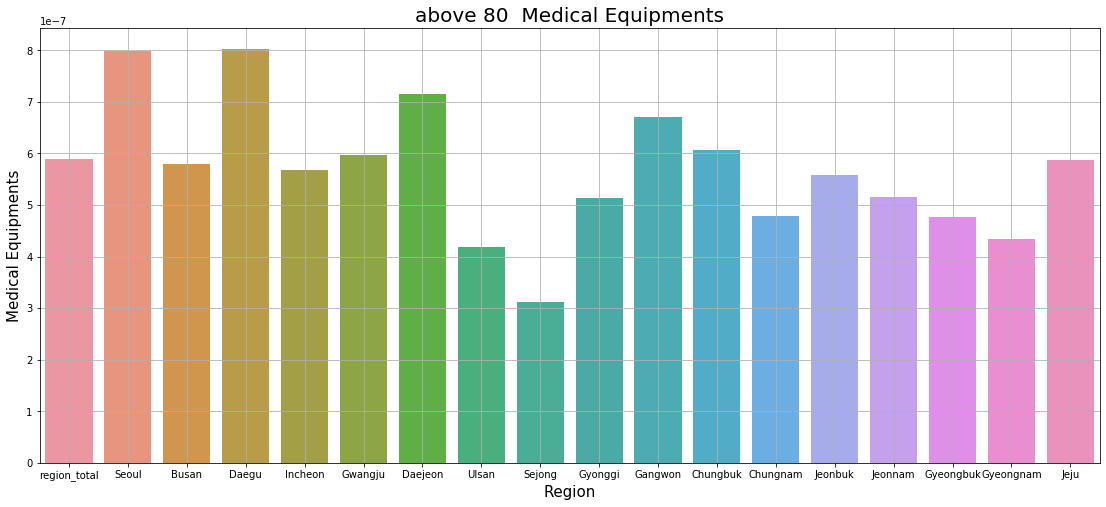

In [205]:
plt.figure(figsize=(19, 8))
sns.barplot(x=total1.index,y=total1['Medical Equipments']/total_1인당본인부담금_지역['above 80'] )
plt.title('above 80  Medical Equipments',fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Medical Equipments',fontsize=15)
plt.grid(True)

---

위 결과값의 예시를 들어보자면 \
요양기관에서 세종과 울산의 경우 0-9세와 60-69세는 세종보다 울산이 본인부담금을 더 잘 쓰고 있지만 80세 이상은 울산보다 세종이 본인부담금을 더 잘쓰고 있습니다.\
아래의 코드의 결과값이 이를 설명해 주고 있습니다.

In [208]:
# 요양기관에서의 값을 작은순서대로 나열한 것
print('--- 0~9 ---')
print((total1['Care Institutions']/total_1인당본인부담금_지역['0-9']).sort_values())
print('--- 60~69 ---')
print((total1['Care Institutions']/total_1인당본인부담금_지역['60-69']).sort_values())
print('--- above 80 ---')
print((total1['Care Institutions']/total_1인당본인부담금_지역['above 80']).sort_values())

--- 0~9 ---
Sejong          6.35573e-06
Gyeongnam       6.74272e-06
Incheon         6.81034e-06
Gyonggi         6.98948e-06
Ulsan           7.13193e-06
Gwangju         7.47163e-06
Jeonnam         7.57377e-06
Chungnam        7.82595e-06
Chungbuk        7.84984e-06
Gyeongbuk       7.85803e-06
region_total    8.15334e-06
Busan           8.41163e-06
Daejeon         8.59985e-06
Gangwon         8.64033e-06
Jeju            8.98417e-06
Jeonbuk         9.02031e-06
Daegu           9.29411e-06
Seoul           1.05519e-05
dtype: object
--- 60~69 ---
Sejong          1.98184e-06
Incheon         2.08369e-06
Gyeongnam       2.15724e-06
Gyonggi         2.19509e-06
Jeonnam         2.21236e-06
Ulsan           2.24396e-06
Chungnam        2.28507e-06
Gyeongbuk       2.32713e-06
Chungbuk         2.3962e-06
Gangwon         2.43646e-06
Gwangju         2.49792e-06
region_total    2.54428e-06
Busan           2.66072e-06
Jeonbuk         2.71123e-06
Jeju            2.74555e-06
Daejeon         2.89777e-06
Daegu   

### 5) opinion
(지역의료수준/나이별 1인당 본인부담금)의 값이 Total보다 낮은 지역은 그 연령대의 1인당 본인부담금을 낮추는 것이 좋으며 Total보다 높은 지역은 그 연령대의 1인당 본인부담금을 높이는 것이 좋습니다.\
또한 이를 의료시스템의 관점에서 보면 Total보다 낮은 지역은 의료수준을 높일 필요가 있으며 Total보다 높은 지역은 그 지역의 의료수준에 투자를 다른 지역보다 줄일 필요가 있습니다.

# 3. 결론

## (1) 데이터를 분석한 결과

1. 나이가 많아질수록 본인부담금도 높아지는 추세를 보였으며, 남, 여 사이 동일 연령대에서 본인부담금의 차이는 대체적으로 비슷한 것으로 보입니다.
2. 대체적으로 광역시와 특별시의 의료수준이 그 외 지역보다 높으며 본인부담금을 잘 사용하고 있음. 그러나 세종이 특히 의료시스템 및 본인부담금을 다른 지역과 차이가 많이 나게 잘 못사용하고 있음.
3. 광주를 포함한 몇몇지역을 제외하고는 병상과 병실의 수가 많이 부족함.
4. 특정 연령대의 본인부담금을 잘 사용하고 있는 지는 지역마다 차이가 있음을 확인함.

## (2) 데이터 분석을 하며 느낀점

데이터 분석을 하기 전에는 보험에 대해서 몰랐습니다. 종류가 어떻게 되는 것이고, 회사는 어떤 것들이 있고, 보험 처리 과정이 어떤식으로 진행되는지 몰랐습니다. \
데이터 분석을 하기 위해 보험의 종류에 대해서도 알아보고, 이전 주제인 '어느 보험사가 더 이득인지'에 대해 알아보며 회사의 종류도 알게되었습니다. 또한, 국민건강보험의 처리과정도 가볍게나마 알게되었습니다. \
\
이런 것 뿐만 아니라 데이터를 분석하는데 있어서, 발표를 할 때에는 목적이 정확하지 않았고, 그것을 이유로 흐지부지한 채로 발표를 마무리하였던것 같습니다. 하지만 좋은 기회가 다시 찾아와서 진행했던 분석을 다시 한번 정리할 기회가 생겼고, 그 과정동안 수업시간에 배운 내용을 참고하여 어떤 자료형에는 어떤 분석이 더 적합한지, 독자 입장에서는 어떤 시각화가 더 보기 편할지를 생각하며 다시 coding할 수 있었고, 목적을 정확히 다시 찾아 원하는 방향으로 데이터를 분석하고, 생각을 정리해 볼 수 있었습니다.\
\
이를 계기로 다음 기말 프로젝트에서는 처음 발표부터 명확하게 목표를 세우고, 그에 맞게 데이터를 찾아보고, 분석해 나가야겠다는 생각을 하게 되었습니다.